In [49]:
include("../src/include_file.jl");

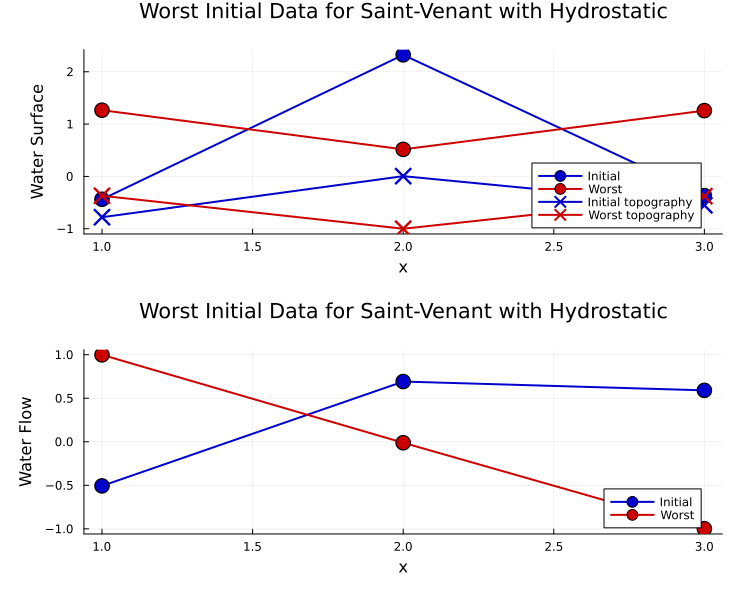

Worst value found for epsilon : -2.691286057025657


In [33]:
Nx = 50
CFL_factor = 0.5
#topoHeight = 2.0
eq = SaintVenant(bump_zb(), 1e-10)

method = createHydrostatic(CFL_factor, Rusanov)
#method = Rusanov(CFL_factor)

boxBounds=[0.0 3;-1.0 1.0]
sourceBounds=[-1.0, 1.0]

sol = iterate_WID(Nx, eq, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)

plotWorstWD(sol, eq)#, SaveMode())

# Reconstruction of the initial data from the optimization results
u_init, z = extendInitialDataToK(sol, Nx);

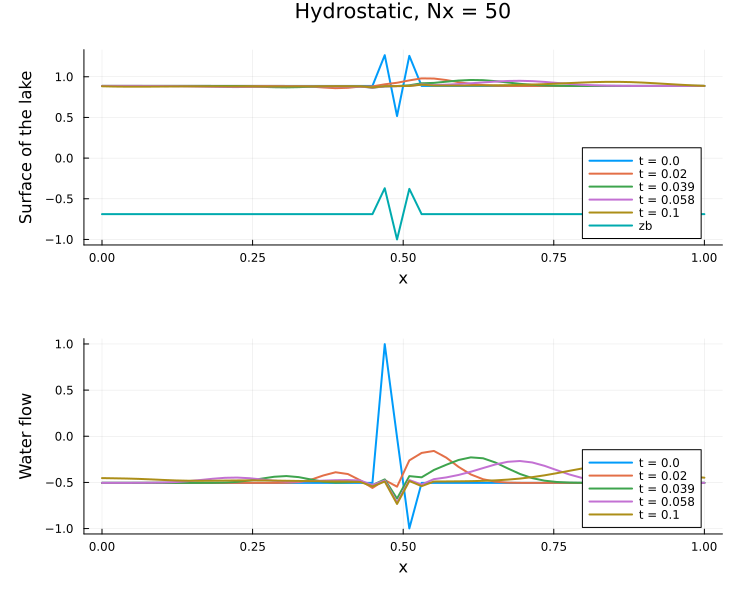

nothing

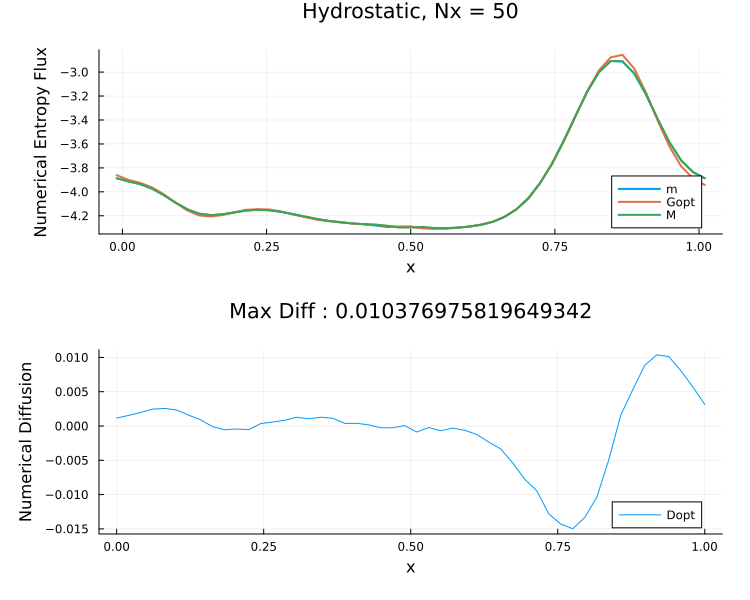

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:434 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.000519e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1671

(u, up, z) = ([1.5719301025164287 -0.45692845169467144; 1.5687898942784164 -0.45764362797159674; 1.5671325669689973 -0.45856303348092925; 1.5668110697954505 -0.46135061794965704; 1.5674998020325732 -0.4662634727015777; 1.5687120174647755 -0.4722806789853819; 1.5699255285431784 -0.477780996715588; 1.570749047874337 -0.4814059885647382; 1.571032217426344 -

In [34]:
domain = createUnitInterval(Nx, 0.0, 0.1)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=5))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method)
display(plot_solution(solEnt))

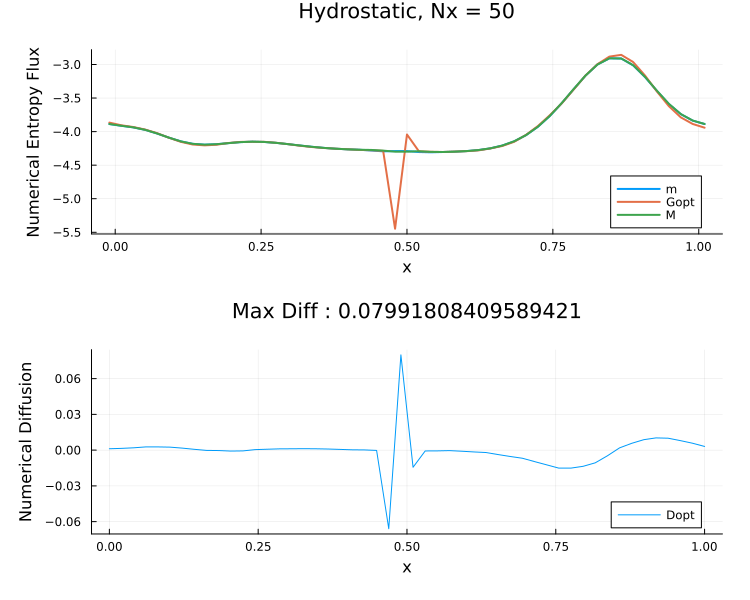

nothing

In [40]:
solEnt = optimize_for_entropy(u_init, domain, eq, method; optimFunctional=WeightedMinFun())
display(plot_solution(solEnt))
#plot(domain.interfaces, solEnt.Copt, label="Copt")
#plot!(domain.x, solEnt.Dopt, label="Dopt")

In [37]:
#J(WeightedMinFun(), solEnt.Gopt, solEnt.u_approx[end-1], solEnt.u_approx[end], Nx, domain.dx, solEnt.dt_vec[end], solEnt.m_vec, solEnt.M_vec, eq, domain)

J(WeightedMinFun(), initial_guess(MeanInitGuess(), solEnt.m_vec, solEnt.M_vec), solEnt.u_approx[end-1], solEnt.u_approx[end], Nx, domain.dx, solEnt.dt_vec[end], solEnt.m_vec, solEnt.M_vec, eq, domain)

1.0005879080239153

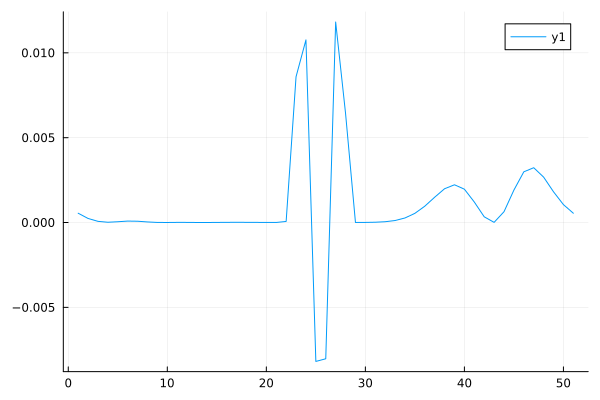

In [36]:
plot(solEnt.M_vec .- solEnt.m_vec)

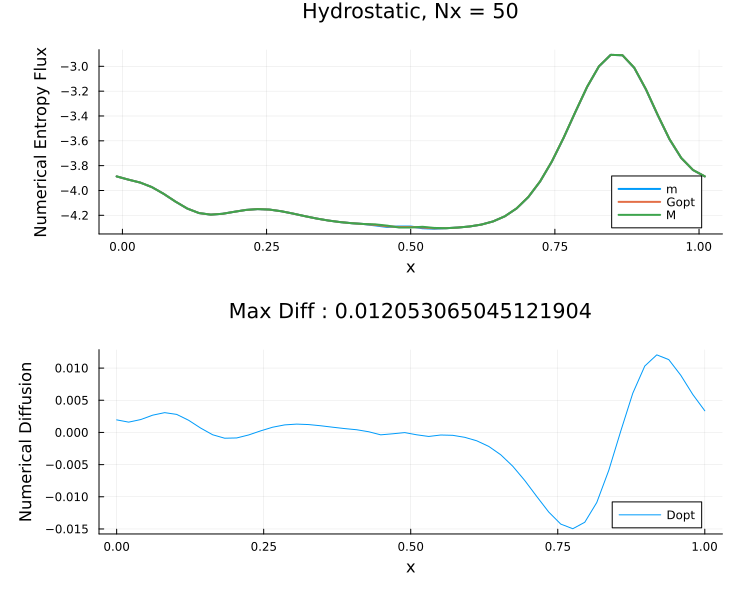

nothing

In [42]:
solEnt = optimize_for_entropy(u_init, domain, eq, method; optimFunctional=WeightedMinFun())
display(plot_solution(solEnt))

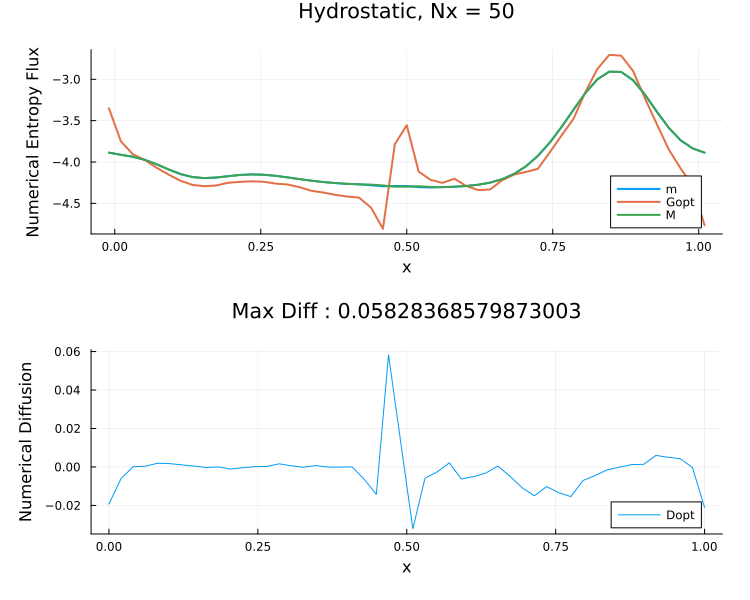

nothing

In [44]:
solEnt = optimize_for_entropy(u_init, domain, eq, method; optimFunctional=WeightedMinFun())
display(plot_solution(solEnt))

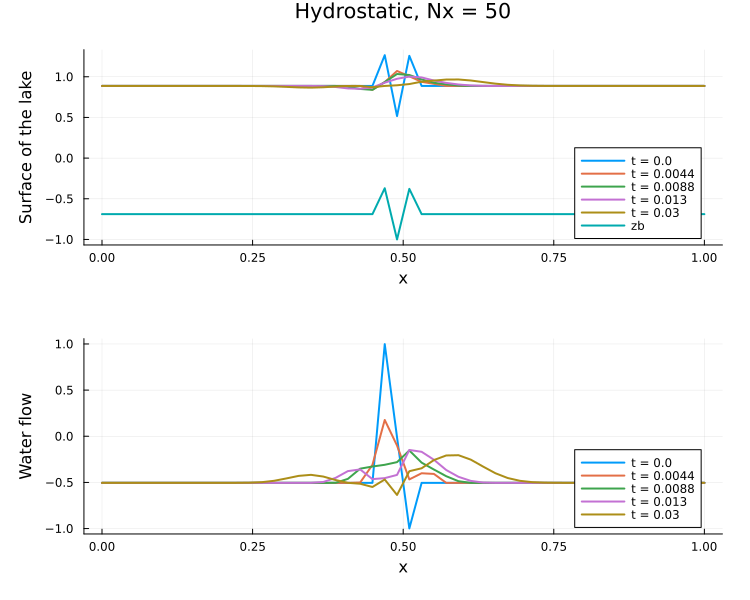

nothing

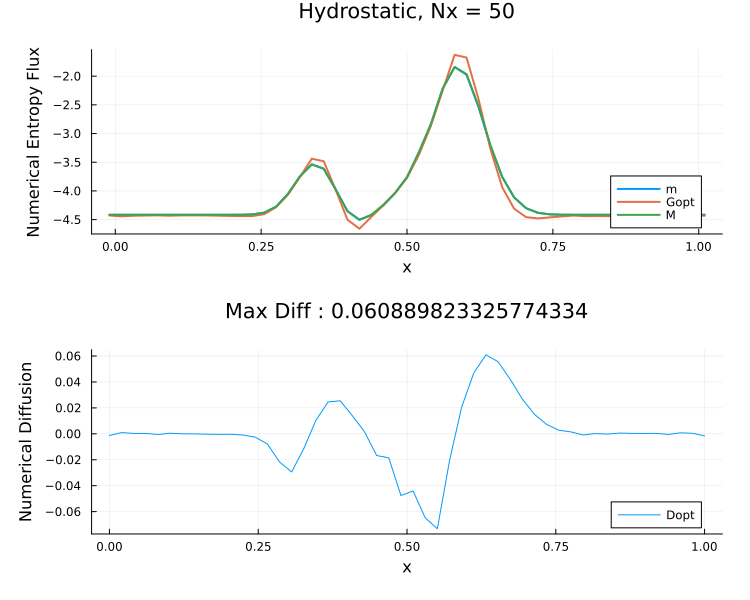

nothing

In [47]:
# The final time is smaller

domain = createUnitInterval(Nx, 0.0, 0.03)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=5))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method)
display(plot_solution(solEnt))

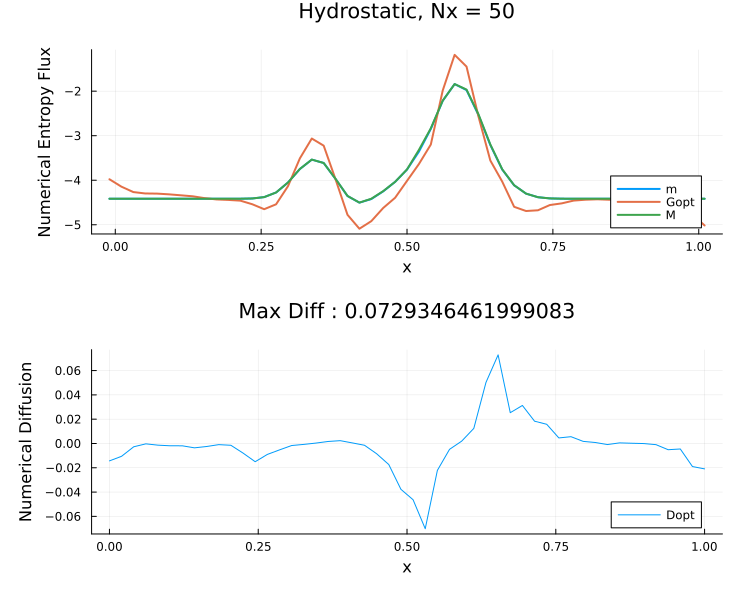

nothing

In [48]:
solEnt = optimize_for_entropy(u_init, domain, eq, method; optimFunctional=WeightedMinFun())
display(plot_solution(solEnt))

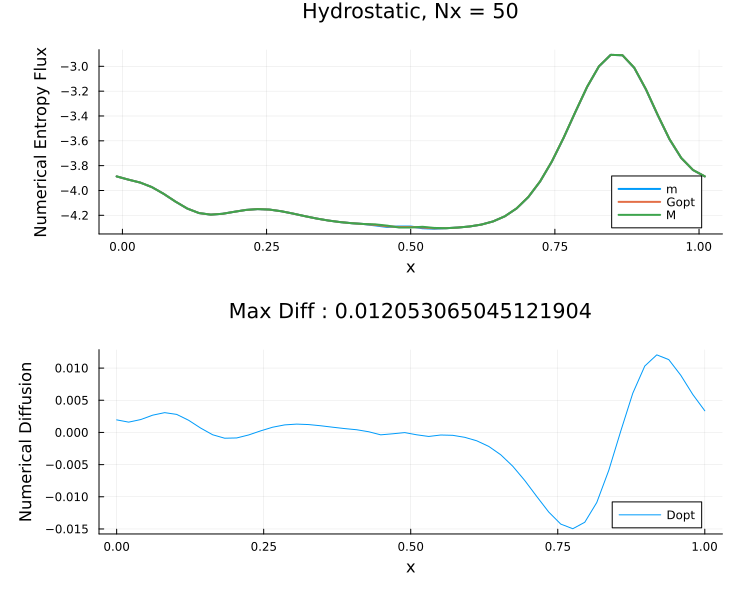

nothing

In [50]:
domain = createUnitInterval(Nx, 0.0, 0.1)
domain.sourceVec = z

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method; optimFunctional=WeightedMinFun())
display(plot_solution(solEnt))